In [5]:
import pyvista as pv
import numpy as np
# Create a sphere surface mesh
sphere_surface = pv.Sphere(radius=1.0, theta_resolution=5, phi_resolution=5)

# Convert to a tetrahedral mesh
tetra_mesh = sphere_surface.delaunay_3d()


/Users/tsakalis/Library/Caches/pypoetry/virtualenvs/phd-dWXyEp8j-py3.11/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/tsakalis/Library/Caches/pypoetry/virtualenvs/phd-dWXyEp8j-py3.11/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


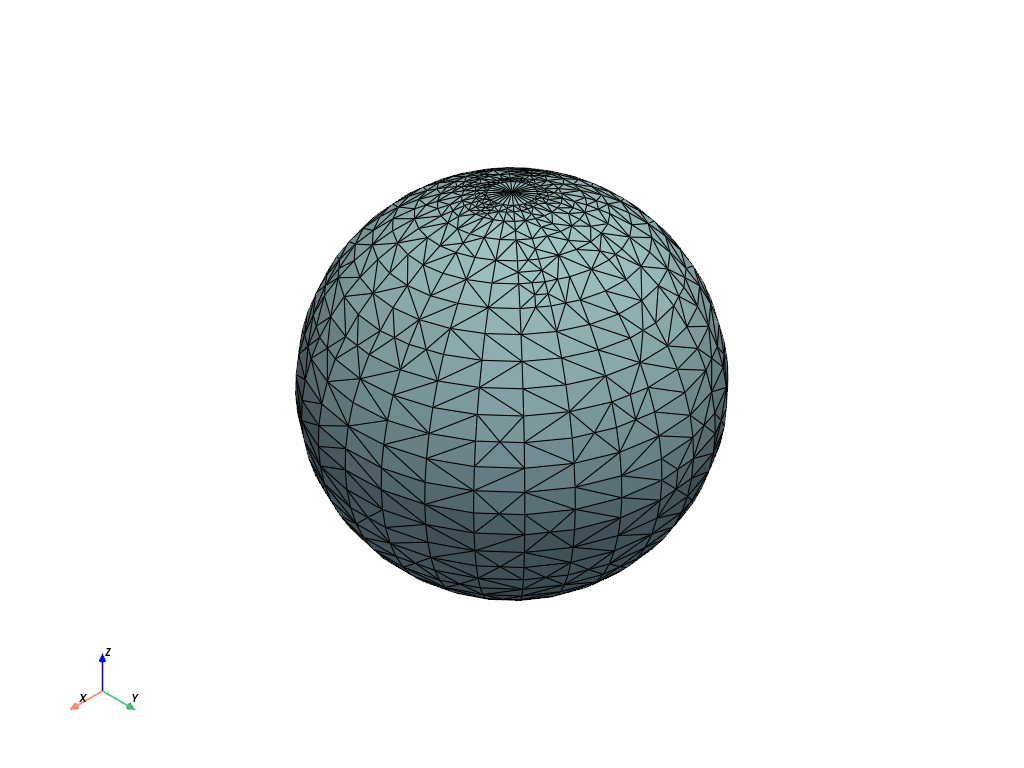

In [14]:
import pyvista as pv
import tetgen
import numpy as np

pv.set_plot_theme('document')

sphere = pv.Sphere()
tet = tetgen.TetGen(sphere)
tet.tetrahedralize(order=1, mindihedral=20, minratio=1.5)
grid = tet.grid
grid.plot(show_edges=True)

In [13]:
nodes

array([[  0.        ,   0.        ,  10.        ],
       [  0.        ,   0.        , -10.        ],
       [  0.80466568,   0.        ,   9.96757317],
       ...,
       [  3.85861225,   8.62864475,  -3.16411178],
       [  1.85900038,   5.83862678,   0.38393001],
       [  2.31714403,   6.22511279,   0.07627728]])

/Users/tsakalis/Library/Caches/pypoetry/virtualenvs/phd-dWXyEp8j-py3.11/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/tsakalis/Library/Caches/pypoetry/virtualenvs/phd-dWXyEp8j-py3.11/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


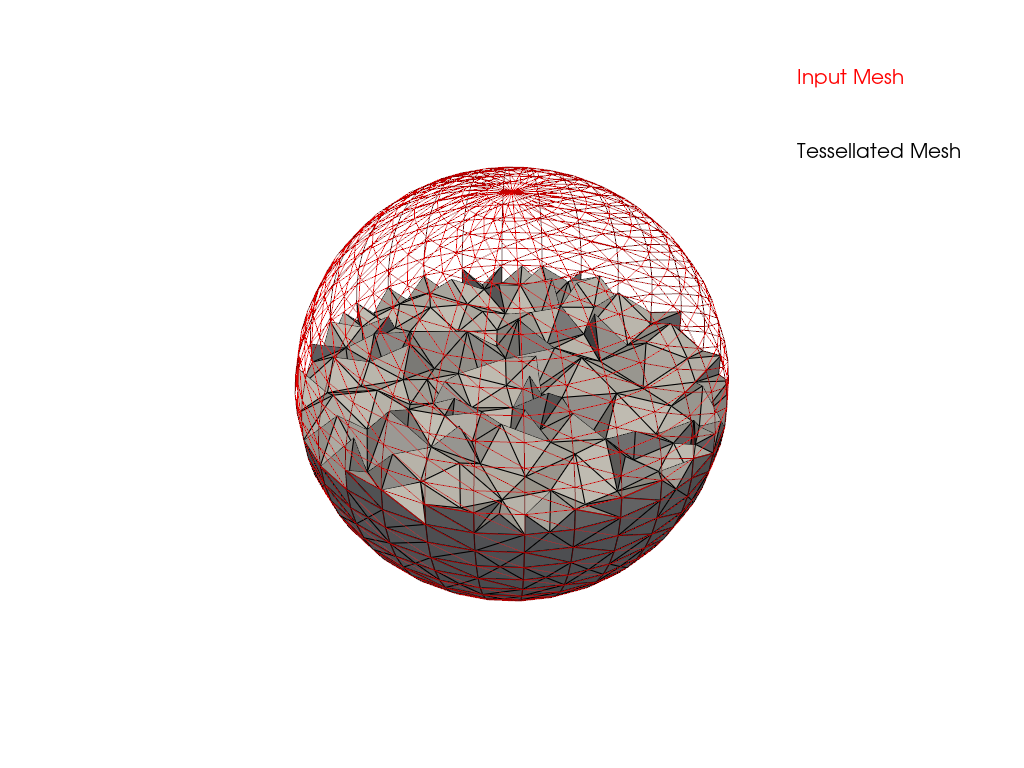

In [15]:
# get cell centroids
cells = grid.cells.reshape(-1, 5)[:, 1:]
cell_center = grid.points[cells].mean(1)

# extract cells below the 0 xy plane
mask = cell_center[:, 2] < 0
cell_ind = mask.nonzero()[0]
subgrid = grid.extract_cells(cell_ind)

# advanced plotting
plotter = pv.Plotter()
plotter.add_mesh(subgrid, 'lightgrey', lighting=True, show_edges=True)
plotter.add_mesh(sphere, 'r', 'wireframe')
plotter.add_legend([[' Input Mesh ', 'r'], [' Tessellated Mesh ', 'black']])
plotter.show()

In [16]:
cell_qual = subgrid.compute_cell_quality()['CellQuality']

/Users/tsakalis/Library/Caches/pypoetry/virtualenvs/phd-dWXyEp8j-py3.11/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/tsakalis/Library/Caches/pypoetry/virtualenvs/phd-dWXyEp8j-py3.11/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


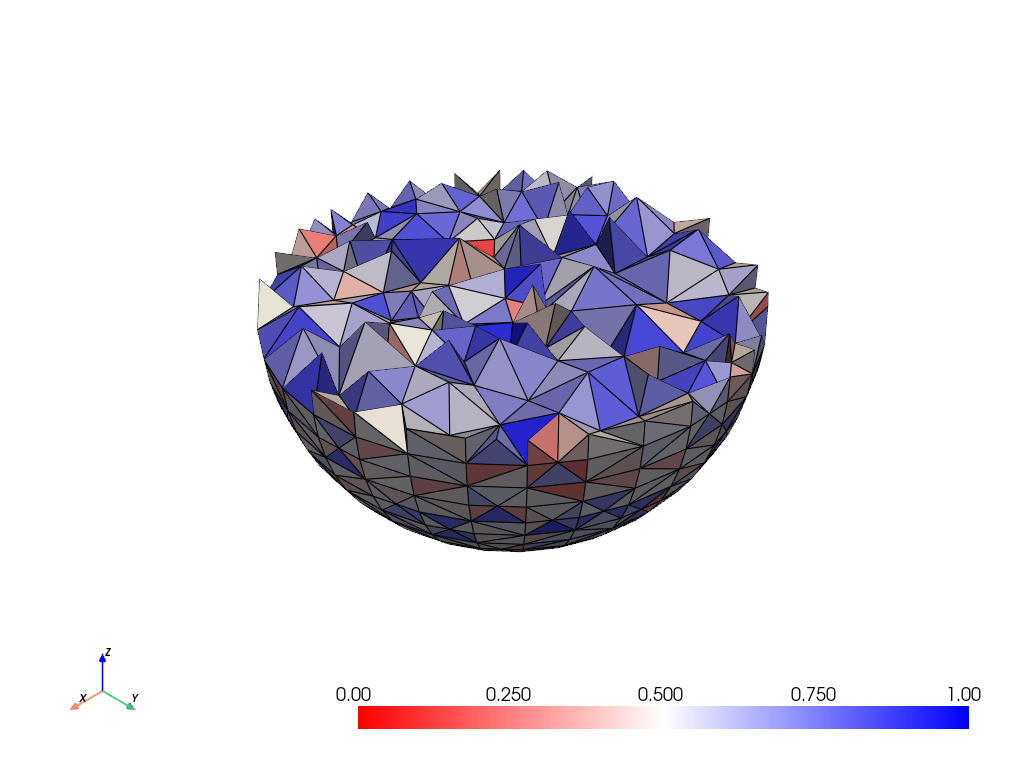

In [18]:
subgrid.plot(
    scalars=cell_qual,
    #  stitle='Quality',
    cmap='bwr',
    clim=[0, 1],
    flip_scalars=True,
    show_edges=True)

/Users/tsakalis/Library/Caches/pypoetry/virtualenvs/phd-dWXyEp8j-py3.11/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


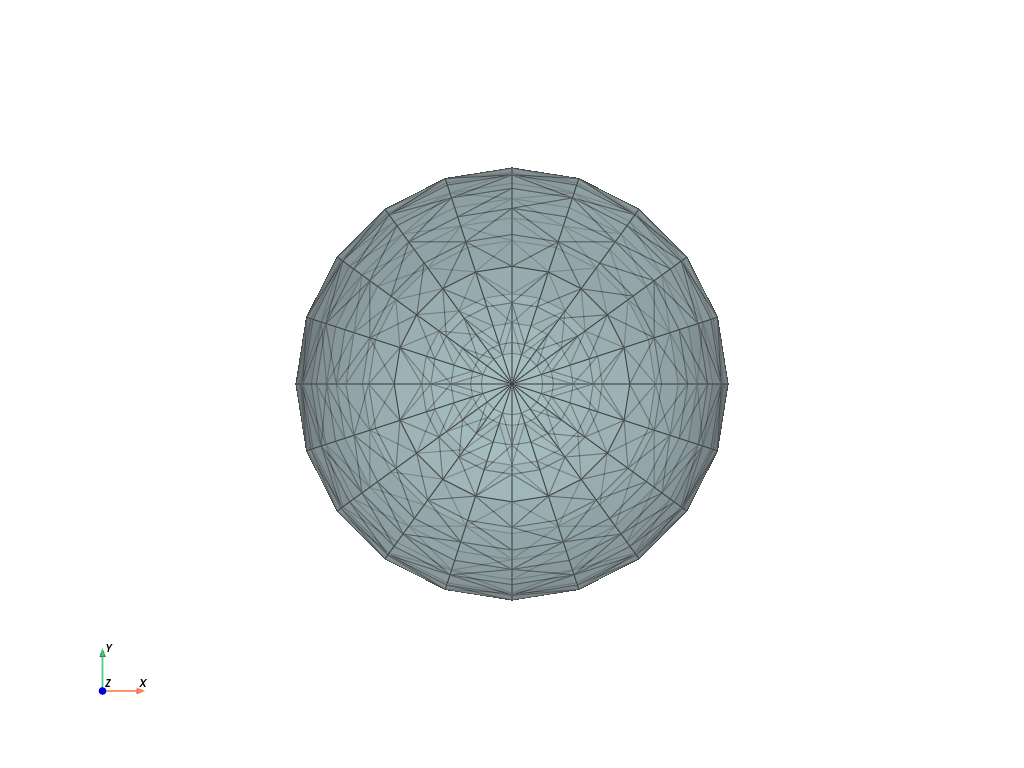

In [23]:
sphere_surface = pv.Sphere(radius=300.0,
                           theta_resolution=20,
                           phi_resolution=20)
tetra_mesh = sphere_surface.delaunay_3d(
)  # Use alpha parameter to control meshing

# Extract vertices and tetrahedral cells
vertices = tetra_mesh.points
tetra_indices = tetra_mesh.cells_dict[pv.CellType.TETRA].flatten()
# Create a PyVista plotter
plotter = pv.Plotter()

# Add the tetrahedral mesh to the plotter
plotter.add_mesh(
    tetra_mesh,  # The mesh to plot
    show_edges=True,  # Display mesh edges
    opacity=0.5,  # Set mesh opacity (0.0 to 1.0)
    color="lightblue",  # Set mesh color
)

# Add axes for reference
plotter.add_axes()

# Set camera position (optional)
plotter.view_xy()  # View from the top (X-Y plane)

# Display the plot
plotter.show()